# Noise supression -- spectrum substraction method

In [11]:
%run ../../lib/dsp.py

214748.3648

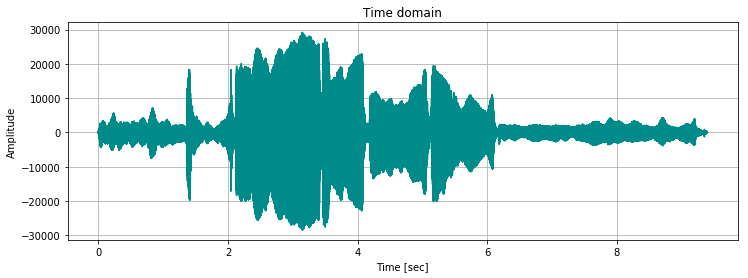

In [12]:
rate, data = read('./data/tin_whistle_music.wav')
setenv(fs=rate, real_only=True, grid=True)
plot_wave(data)

THRESHOLD = 32768**2 * 0.0002
THRESHOLD

In [22]:
play(rate=rate, data=data)

## Spectrum subtraction

$$ y(n) = x(n) + w(n) $$

$$ x(n) = y(n) - w(n) $$

$$ X(k) = Y(k) - W(k) = (A_Y(k) - A_W(k)) \exp (j \Theta_w(k)) $$

(0, 5000)

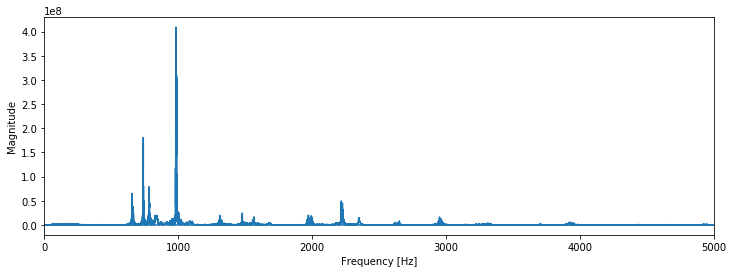

In [25]:
X = fft(data)    # Input signal
A = np.abs(X)    # Angle
T = np.angle(X)  # Theta
freq = fftfreq(len(A), 1/rate)
plt.figure(figsize=[12,4])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.plot(freq, A)
plt.xlim([0,5000])

(0, 5000)

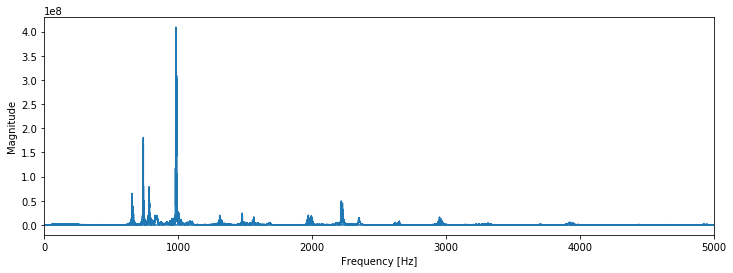

In [26]:
a = np.where((A - THRESHOLD) > 0, A, 0)
plt.figure(figsize=[12,4])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.plot(freq, a)
plt.xlim([0,5000])

In [27]:
Y_real = a * np.cos(T)
Y_imag = a * np.sin(T)
Y = Y_real + 1j * Y_imag

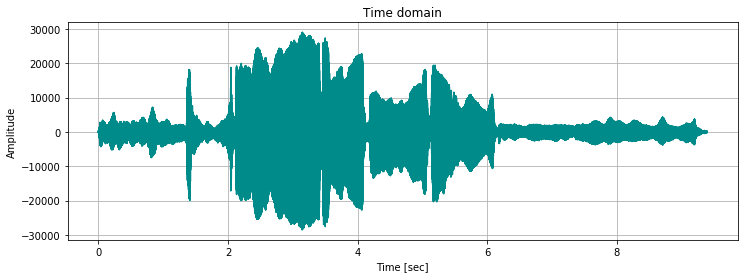

In [28]:
y = ifft(Y)
plot_wave(y)

In [29]:
play(rate=rate, data=np.real(y))